In [1]:
import pandas as pnd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
df=pnd.read_csv("Analysis_Dataset.csv")

In [3]:
df

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine
0,54670e2998350a9f0e4868d5,worker,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dd...,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f7...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273065.0,165261853e188ca69c4fbcdf
1,54670e2998350a9f0e4868d5,worker,92759a73039692b2d3e0929cadf55f5b07b40d6582c36f...,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca438...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273056.0,31dbf829549b10917e7193a6
2,54670e2998350a9f0e4868d5,worker,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1...,09d41bf627188adc004b2db7c0a47578325952cc3340af...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273067.0,31dbf829549b10917e7193a6
3,54670e2998350a9f0e4868d5,worker,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e3...,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef
4,54670e2998350a9f0e4868d5,worker,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc...,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5
...,...,...,...,...,...,...,...,...,...
994,259758d8ce7dab19c47c1cf9,worker,d3c11b862634e6185c22d7c89fc08f667527b39779cb41...,9f7742973dbe2b8d2b6bf1375abfd4e073f45450638fdc...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,Terminated,3547830.0,3550678.0,b2897296e9402cce1ac00e73
995,259758d8ce7dab19c47c1cf9,worker,a6812a028da978a3ab462f2ca15080b5c91799eb932cf2...,6909a44a6bbe9771cc32842680dca931c924aa1b48ae6c...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,Terminated,3547831.0,3550928.0,64ce8199950afc63fd21fe96
996,259758d8ce7dab19c47c1cf9,worker,02e216e963305f5bf68e992721e2cf95d927bab59b1c04...,576c557d87df01c2a8d8533ecc7a067aa484710e8a23bb...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,Terminated,3547832.0,3550654.0,6e5816c3b9334f11d9e215b1
997,259758d8ce7dab19c47c1cf9,worker,5f679bd45fd663ebe3f425102bff77290e9700765b8266...,1cb644ae688049b36de4187db4f3cc6532a90bbdfabb35...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,Terminated,3547831.0,3550743.0,c3a67200eaebd3d87534419d


Descriptive analysis

In [4]:
df.describe()

,start_time,end_time
count,9.660000e+02,9.850000e+02
mean,2.528277e+06,2.558755e+06
std,9.115939e+05,9.204741e+05
min,1.440387e+06,1.440410e+06
25%,1.457995e+06,1.459302e+06
50%,3.273582e+06,3.274698e+06
75%,3.273583e+06,3.274724e+06
max,3.588304e+06,3.590547e+06


In [5]:
df.head()

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine
0,54670e2998350a9f0e4868d5,worker,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dd...,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f7...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273065.0,165261853e188ca69c4fbcdf
1,54670e2998350a9f0e4868d5,worker,92759a73039692b2d3e0929cadf55f5b07b40d6582c36f...,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca438...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273056.0,31dbf829549b10917e7193a6
2,54670e2998350a9f0e4868d5,worker,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1...,09d41bf627188adc004b2db7c0a47578325952cc3340af...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273067.0,31dbf829549b10917e7193a6
3,54670e2998350a9f0e4868d5,worker,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e3...,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef
4,54670e2998350a9f0e4868d5,worker,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc...,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5


In [6]:
df.isna().sum()

job_name        0
task_name       0
inst_name       0
worker_name     0
inst_id         0
status          0
start_time     33
end_time       14
machine         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   job_name     999 non-null    object 
 1   task_name    999 non-null    object 
 2   inst_name    999 non-null    object 
 3   worker_name  999 non-null    object 
 4   inst_id      999 non-null    object 
 5   status       999 non-null    object 
 6   start_time   966 non-null    float64
 7   end_time     985 non-null    float64
 8   machine      999 non-null    object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB


In [8]:
from sklearn import preprocessing

In [9]:
label_encoder=preprocessing.LabelEncoder()

In [10]:
df['task_name']=label_encoder.fit_transform(df['task_name']) 

In [11]:
df['task_name'].unique()

array([6, 5, 4, 1, 7, 2, 0, 3])

In [12]:
df['status']=label_encoder.fit_transform(df['status']) 

In [13]:
df

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine
0,54670e2998350a9f0e4868d5,6,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dd...,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f7...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273065.0,165261853e188ca69c4fbcdf
1,54670e2998350a9f0e4868d5,6,92759a73039692b2d3e0929cadf55f5b07b40d6582c36f...,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca438...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273056.0,31dbf829549b10917e7193a6
2,54670e2998350a9f0e4868d5,6,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1...,09d41bf627188adc004b2db7c0a47578325952cc3340af...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273067.0,31dbf829549b10917e7193a6
3,54670e2998350a9f0e4868d5,6,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e3...,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef
4,54670e2998350a9f0e4868d5,6,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc...,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5
...,...,...,...,...,...,...,...,...,...
994,259758d8ce7dab19c47c1cf9,6,d3c11b862634e6185c22d7c89fc08f667527b39779cb41...,9f7742973dbe2b8d2b6bf1375abfd4e073f45450638fdc...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547830.0,3550678.0,b2897296e9402cce1ac00e73
995,259758d8ce7dab19c47c1cf9,6,a6812a028da978a3ab462f2ca15080b5c91799eb932cf2...,6909a44a6bbe9771cc32842680dca931c924aa1b48ae6c...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550928.0,64ce8199950afc63fd21fe96
996,259758d8ce7dab19c47c1cf9,6,02e216e963305f5bf68e992721e2cf95d927bab59b1c04...,576c557d87df01c2a8d8533ecc7a067aa484710e8a23bb...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547832.0,3550654.0,6e5816c3b9334f11d9e215b1
997,259758d8ce7dab19c47c1cf9,6,5f679bd45fd663ebe3f425102bff77290e9700765b8266...,1cb644ae688049b36de4187db4f3cc6532a90bbdfabb35...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550743.0,c3a67200eaebd3d87534419d


In [14]:
df['status'].unique()

array([3, 0, 2, 1])

Correlation

In [15]:
df.corr()

,task_name,status,start_time,end_time
task_name,1.000000,-0.144318,0.975399,0.975324
status,-0.144318,1.000000,-0.090515,-0.191964
start_time,0.975399,-0.090515,1.000000,0.999579
end_time,0.975324,-0.191964,0.999579,1.000000


In [16]:
df.bfill()

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine
0,54670e2998350a9f0e4868d5,6,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dd...,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f7...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273065.0,165261853e188ca69c4fbcdf
1,54670e2998350a9f0e4868d5,6,92759a73039692b2d3e0929cadf55f5b07b40d6582c36f...,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca438...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273056.0,31dbf829549b10917e7193a6
2,54670e2998350a9f0e4868d5,6,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1...,09d41bf627188adc004b2db7c0a47578325952cc3340af...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273067.0,31dbf829549b10917e7193a6
3,54670e2998350a9f0e4868d5,6,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e3...,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef
4,54670e2998350a9f0e4868d5,6,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc...,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5
...,...,...,...,...,...,...,...,...,...
994,259758d8ce7dab19c47c1cf9,6,d3c11b862634e6185c22d7c89fc08f667527b39779cb41...,9f7742973dbe2b8d2b6bf1375abfd4e073f45450638fdc...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547830.0,3550678.0,b2897296e9402cce1ac00e73
995,259758d8ce7dab19c47c1cf9,6,a6812a028da978a3ab462f2ca15080b5c91799eb932cf2...,6909a44a6bbe9771cc32842680dca931c924aa1b48ae6c...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550928.0,64ce8199950afc63fd21fe96
996,259758d8ce7dab19c47c1cf9,6,02e216e963305f5bf68e992721e2cf95d927bab59b1c04...,576c557d87df01c2a8d8533ecc7a067aa484710e8a23bb...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547832.0,3550654.0,6e5816c3b9334f11d9e215b1
997,259758d8ce7dab19c47c1cf9,6,5f679bd45fd663ebe3f425102bff77290e9700765b8266...,1cb644ae688049b36de4187db4f3cc6532a90bbdfabb35...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550743.0,c3a67200eaebd3d87534419d


In [17]:
df = df.replace(np.nan, 0)

In [18]:
df.dropna()

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine
0,54670e2998350a9f0e4868d5,6,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dd...,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f7...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273065.0,165261853e188ca69c4fbcdf
1,54670e2998350a9f0e4868d5,6,92759a73039692b2d3e0929cadf55f5b07b40d6582c36f...,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca438...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273056.0,31dbf829549b10917e7193a6
2,54670e2998350a9f0e4868d5,6,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1...,09d41bf627188adc004b2db7c0a47578325952cc3340af...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273067.0,31dbf829549b10917e7193a6
3,54670e2998350a9f0e4868d5,6,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e3...,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef
4,54670e2998350a9f0e4868d5,6,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc...,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5
...,...,...,...,...,...,...,...,...,...
994,259758d8ce7dab19c47c1cf9,6,d3c11b862634e6185c22d7c89fc08f667527b39779cb41...,9f7742973dbe2b8d2b6bf1375abfd4e073f45450638fdc...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547830.0,3550678.0,b2897296e9402cce1ac00e73
995,259758d8ce7dab19c47c1cf9,6,a6812a028da978a3ab462f2ca15080b5c91799eb932cf2...,6909a44a6bbe9771cc32842680dca931c924aa1b48ae6c...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550928.0,64ce8199950afc63fd21fe96
996,259758d8ce7dab19c47c1cf9,6,02e216e963305f5bf68e992721e2cf95d927bab59b1c04...,576c557d87df01c2a8d8533ecc7a067aa484710e8a23bb...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547832.0,3550654.0,6e5816c3b9334f11d9e215b1
997,259758d8ce7dab19c47c1cf9,6,5f679bd45fd663ebe3f425102bff77290e9700765b8266...,1cb644ae688049b36de4187db4f3cc6532a90bbdfabb35...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550743.0,c3a67200eaebd3d87534419d


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df[['task_name','start_time']]
y = df[['end_time']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=9)

#Linear regression

In [22]:
lin_reg_mod = LinearRegression()

In [23]:
df

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine
0,54670e2998350a9f0e4868d5,6,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dd...,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f7...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273065.0,165261853e188ca69c4fbcdf
1,54670e2998350a9f0e4868d5,6,92759a73039692b2d3e0929cadf55f5b07b40d6582c36f...,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca438...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273056.0,31dbf829549b10917e7193a6
2,54670e2998350a9f0e4868d5,6,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1...,09d41bf627188adc004b2db7c0a47578325952cc3340af...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273067.0,31dbf829549b10917e7193a6
3,54670e2998350a9f0e4868d5,6,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e3...,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef
4,54670e2998350a9f0e4868d5,6,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc...,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986...,68889727c2257f702108d185e5eed342a39807a2893d4b...,3,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5
...,...,...,...,...,...,...,...,...,...
994,259758d8ce7dab19c47c1cf9,6,d3c11b862634e6185c22d7c89fc08f667527b39779cb41...,9f7742973dbe2b8d2b6bf1375abfd4e073f45450638fdc...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547830.0,3550678.0,b2897296e9402cce1ac00e73
995,259758d8ce7dab19c47c1cf9,6,a6812a028da978a3ab462f2ca15080b5c91799eb932cf2...,6909a44a6bbe9771cc32842680dca931c924aa1b48ae6c...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550928.0,64ce8199950afc63fd21fe96
996,259758d8ce7dab19c47c1cf9,6,02e216e963305f5bf68e992721e2cf95d927bab59b1c04...,576c557d87df01c2a8d8533ecc7a067aa484710e8a23bb...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547832.0,3550654.0,6e5816c3b9334f11d9e215b1
997,259758d8ce7dab19c47c1cf9,6,5f679bd45fd663ebe3f425102bff77290e9700765b8266...,1cb644ae688049b36de4187db4f3cc6532a90bbdfabb35...,b8dcabc5ed4723ef2321da505269e781ade92fd414fcc4...,3,3547831.0,3550743.0,c3a67200eaebd3d87534419d


In [24]:
lin_reg_mod.fit(x_train, y_train)

LinearRegression()

In [25]:
pred = lin_reg_mod.predict(x_test)

In [26]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [27]:
print(test_set_rmse)
print(test_set_r2)

520888.05964911217
0.7259932413186234


In [28]:
 df_prediction = pnd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': pred.squeeze()})

In [29]:
df_prediction

,Actual,Predicted
2,3273067.0,3.306568e+06
785,1459299.0,1.467725e+06
57,3274734.0,3.306607e+06
496,1442820.0,3.470124e+06
611,1459282.0,1.467725e+06
...,...,...
41,3274694.0,3.306607e+06
425,3278734.0,1.874425e+06
106,3274697.0,3.306607e+06
80,3274716.0,3.306607e+06


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

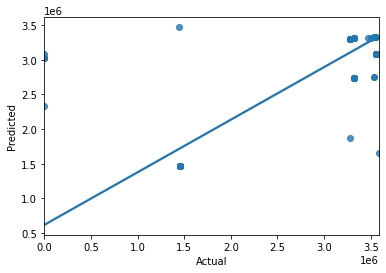

In [30]:
import seaborn as sb
sb.regplot(x = "Actual",
            y = "Predicted", 
            ci = None,
            data = df_prediction)

In [31]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

#Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
RF = RandomForestRegressor(n_estimators=20, max_depth=3,  random_state=SEED)

RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

<ipython-input-33-ad1b426d6a42>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


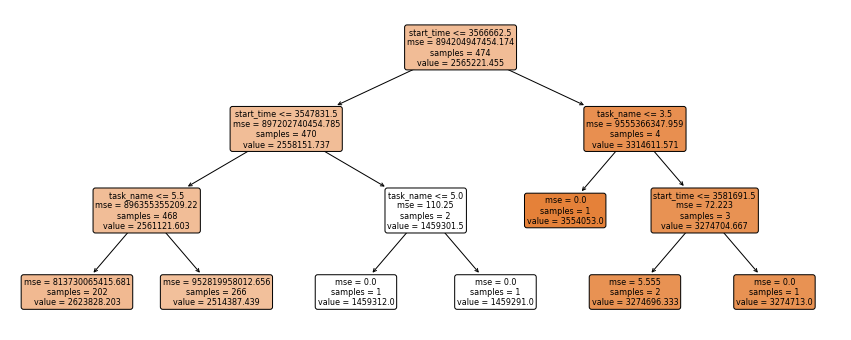

In [34]:
from sklearn import tree

features = x.columns
first_tree = RF.estimators_[0]

plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8, 
               filled=True, 
               rounded=True);

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 940338.9018500708
Mean Squared Error: 976257452855.9856
Root Mean Squared Error: 988057.4137447609


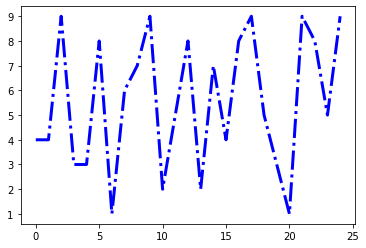

In [36]:
x = np.random.randint(low=1, high=10, size=25)

plt.plot(x, color = 'blue', linewidth=3, linestyle='-.')
plt.show()

In [37]:
df["status"] = df["status"].astype("category")

In [38]:
df.status.unique()

[3, 0, 2, 1]
Categories (4, int64): [3, 0, 2, 1]

In [39]:
x = df[['task_name','start_time','end_time']]
y = df[['status']]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=9)

In [43]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D 
from keras.layers.convolutional import Conv1D
from tensorflow.keras.optimizers import Adam 

In [44]:
from keras.models import Sequential 
from keras.layers import Dense 
  
model_cnn = Sequential() 
model_cnn.add(Dense(12, input_dim=3, activation='relu')) 
model_cnn.add(Dense(3, activation='relu')) 
model_cnn.add(Dense(1, activation='softmax'))  
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model_cnn.fit(x_train, y_train, epochs=50, batch_size=32) 
scores = model_cnn.evaluate(x_test, y_test) 
print("\n%s: %.2f%%" % (model_cnn.metrics_names[1], scores[1]*100)) 

Epoch 1/50
24/24 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267 
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 8/50
24/24 [==============================] - 0s 999us/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0267
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0000